In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tkinter import *
from tkinter import filedialog
from PIL import Image, ImageTk
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Flatten, Dropout
import tensorflow as tf

# 设置 CPU 多线程
tf.config.threading.set_intra_op_parallelism_threads(8)  # 设置单个操作内部的线程数
tf.config.threading.set_inter_op_parallelism_threads(8)  # 设置多个操作之间的线程数


# 加载MNIST数据集
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 数据预处理
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [2]:
model = Sequential([
    Flatten(input_shape=(28, 28)),  # 将28x28的图像展平成784的向量
    Dense(256, activation='relu'),  # 增加神经元数量
    Dropout(0.5),  # 添加Dropout防止过拟合
    Dense(128, activation='relu'),
    Dropout(0.5),  # 添加Dropout防止过拟合
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # 输出层，10个节点，对应数字0-9
])

model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 10)                6

In [3]:
history = model.fit(x_train, y_train, epochs=15, batch_size=128, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 2s 3ms/step - loss: 0.6037 - accuracy: 0.8074 - val_loss: 0.1494 - val_accuracy: 0.9550
Epoch 2/15
422/422 [==============================] - 1s 3ms/step - loss: 0.2637 - accuracy: 0.9246 - val_loss: 0.1164 - val_accuracy: 0.9682
Epoch 3/15
422/422 [==============================] - 1s 3ms/step - loss: 0.2104 - accuracy: 0.9384 - val_loss: 0.0991 - val_accuracy: 0.9708
Epoch 4/15
422/422 [==============================] - 1s 3ms/step - loss: 0.1792 - accuracy: 0.9471 - val_loss: 0.0882 - val_accuracy: 0.9750
Epoch 5/15
422/422 [==============================] - 1s 3ms/step - loss: 0.1625 - accuracy: 0.9517 - val_loss: 0.0911 - val_accuracy: 0.9737
Epoch 6/15
422/422 [==============================] - 1s 3ms/step - loss: 0.1462 - accuracy: 0.9567 - val_loss: 0.0812 - val_accuracy: 0.9775
Epoch 7/15
422/422 [==============================] - 1s 3ms/step - loss: 0.1338 - accuracy: 0.9602 - val_loss: 0.0756 - val_accuracy: 0.9793
Epoch 

In [4]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0725 - accuracy: 0.9798
Test accuracy: 0.9797999858856201


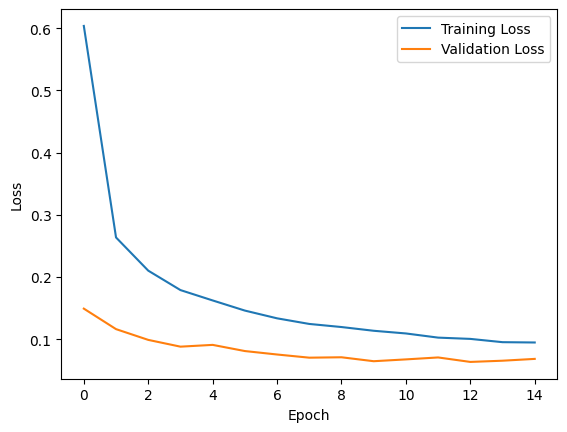

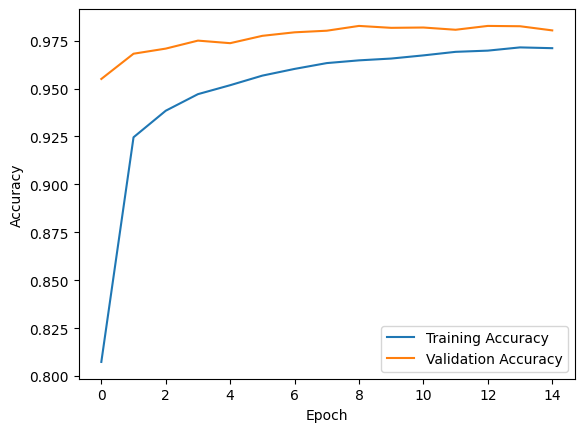

In [5]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

313/313 [==============================] - 0s 1ms/step
Confusion Matrix:
[[ 971    0    1    1    0    1    2    1    2    1]
 [   0 1126    3    1    0    1    2    0    2    0]
 [   2    3 1007    5    2    0    1    6    5    1]
 [   1    0    3  989    0    5    0    4    2    6]
 [   0    1    2    0  961    0    8    1    0    9]
 [   2    0    0    1    1  877    4    1    2    4]
 [   4    2    0    1    4    3  942    0    2    0]
 [   1    6    7    3    0    0    0 1005    0    6]
 [   4    1    1    3    9    7    2    3  939    5]
 [   2    2    0    4    6    8    0    4    2  981]]


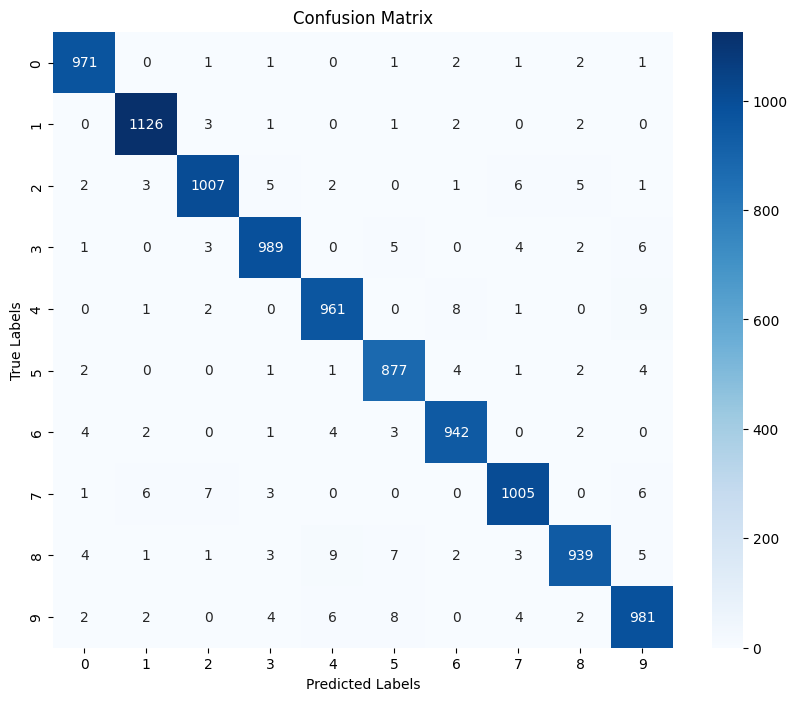

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.97      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.96      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [6]:

# 预测测试集
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# 计算混淆矩阵
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

# 绘制混淆矩阵的热图
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# 打印分类报告
class_report = classification_report(y_true, y_pred_classes)
print("Classification Report:")
print(class_report)


In [ ]:
# 创建Tkinter窗口
root = Tk()
root.title("手写数字识别")
root.geometry("400x400")

def load_image():
    file_path = filedialog.askopenfilename()
    if file_path:
        try:
            # 打开图片并转换为灰度
            img = Image.open(file_path).convert('L')
            # 调整大小为 28x28
            img = img.resize((28, 28), Image.ANTIALIAS)
            # 转换为 numpy 数组
            img_array = np.array(img)
            # 反色处理（如果背景是黑色）  虽然不知道为什么，但是添加了反色处理之后，准确率提升了
            img_array = 255 - img_array
            # 归一化到 [0, 1]
            img_array = img_array / 255.0
            # 调整形状为 (1, 28, 28, 1)
            img_array = img_array.reshape(1, 28, 28, 1)
            
            # 显示选择的图片
            img_display = Image.fromarray((img_array[0, :, :, 0] * 255).astype(np.uint8))
            img_display = img_display.resize((140, 140), Image.ANTIALIAS)
            tk_img = ImageTk.PhotoImage(img_display)
            panel.config(image=tk_img)
            panel.image = tk_img
            
            # 预测数字
            pred = model.predict(img_array)
            pred_class = np.argmax(pred)
            pred_prob = np.max(pred)
            result_label.config(text=f"预测结果: {pred_class}\n置信度: {pred_prob:.2f}")
        except Exception as e:
            result_label.config(text=f"错误: 无法处理图片\n{e}")

# 添加按钮和标签
btn = Button(root, text="选择图片", command=load_image)
btn.pack(pady=20)

panel = Label(root)
panel.pack(pady=20)

result_label = Label(root, text="预测结果: ", font=("Helvetica", 16))
result_label.pack(pady=20)

root.mainloop()

1/1 [==============================] - 0s 57ms/step


C:\Users\ymh33\AppData\Local\Temp\ipykernel_34404\989707780.py:13: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((28, 28), Image.ANTIALIAS)
C:\Users\ymh33\AppData\Local\Temp\ipykernel_34404\989707780.py:25: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img_display = img_display.resize((140, 140), Image.ANTIALIAS)


1/1 [==============================] - 0s 14ms/step
